###### <img src="http://www.upla.cl/normasgraficas/wp-content/uploads/2016/01/logo_upla.png" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> CIF 7359 Inteligencia Artificial I-2024 </h1>

<H3 align='center'> Tarea 1 - Algoritmos de Búsqueda </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* Búsqueda a lo ancho, con costo uniforme y en profundidad.
* Algoritmos genéticos y Simulated annealing.
* Algoritmos de Búsqueda adversaria.


 

** Formalidades **  
* Se debe realizar un jupyter notebook con los pasos, descripciones, análisis y conclusiones (use celdas markdown cuando corresponda).
* La tarea es o individual o en grupos de a 2 (oficialmente asignados), la copia parcial o total será penalizada con nota 1.
* La entrega de la tarea se realizará en el sistema <em>eaula </em> (se debe adjuntar el archivo .ipynb).
* Fecha de Entrega: Domingo 14 de Abril, 23:00 horas. 
* El sistema no aceptarán tareas con retraso.
* Debe estar preparad\@ para presentar su tarea y participar en la clase del Lunes 15 de Abril período . 
* La Nota del informe se calcula: $\left(\frac{\mbox{suma de puntos obtenidos}*6}{14,7}\right)+1$

<hr style="height:2px;border:none"/>

<a id="primero"></a>
## 1. Encuentre el camino.
Considerando el esquema de la figura, necesitamos construir algoritmos de búsquedas que reciban el nodo inicial y el final, y nos devuelvan el camino que debe seguir el agente para llegar desde el nodo inicial al final.

<img src="esquema.png" width="350">

> a) (0,5 pts) Cree el grado de búsqueda en python, utilizando un diccionario llamado graph, donde la llave es el nodo actual, y 
los valores es un conjunto (set) con los nodos que podemos visitar desde el nodo actual. Por ejemplo, 

```python
graph = {
        (1,1): set([(2,1)]),
        (1,2): set([(0,2),(1,1),(2,2)])
            }
```

In [2]:
graph = {
    (0, 0): {(0, 1), (1, 0)},
    (0, 1): {(0, 0), (0, 2), (1, 1)},
    (0, 2): {(0, 1), (0, 3), (1, 2)},
    (0, 3): {(0, 2), (0, 4), (1, 3)},
    (0, 4): {(0, 3), (1, 4)},
    (1, 0): {(0, 0), (1, 1), (2, 0)},
    (1, 1): {(0, 1), (1, 0), (1, 2), (2, 1)},
    (1, 2): {(0, 2), (1, 1), (1, 3), (2, 2)},
    (1, 3): {(0, 3), (1, 2), (1, 4), (2, 3)},
    (1, 4): {(0, 4), (1, 3), (2, 4)},
    (2, 0): {(1, 0), (2, 1), (3, 0)},
    (2, 1): {(1, 1), (2, 0), (2, 2), (3, 1)},
    (2, 2): {(1, 2), (2, 1), (2, 3), (3, 2)},
    (2, 3): {(1, 3), (2, 2), (2, 4), (3, 3)},
    (2, 4): {(1, 4), (2, 3), (3, 4)},
    (3, 0): {(2, 0), (3, 1), (4, 0)},
    (3, 1): {(2, 1), (3, 0), (3, 2), (4, 1)},
    (3, 2): {(2, 2), (3, 1), (3, 3), (4, 2)},
    (3, 3): {(2, 3), (3, 2), (3, 4), (4, 3)},
    (3, 4): {(2, 4), (3, 3), (4, 4)},
    (4, 0): {(3, 0), (4, 1)},
    (4, 1): {(3, 1), (4, 0), (4, 2)},
    (4, 2): {(3, 2), (4, 1), (4, 3)},
    (4, 3): {(3, 3), (4, 2), (4, 4)},
    (4, 4): {(3, 4), (4, 3)}
}

Necesitamos programar agentes que sean capaces de resolver un puzzle deslizante, moviéndose desde una posición de origen, hasta una posición destino:

$origen=\begin{bmatrix} 2 & 8 & 3 \\ 1 & 6 & 4 \\ 7 & 0 & 5 \end{bmatrix} \, ,
destino = \begin{bmatrix} 1 & 2 & 3 \\ 8 & 0 & 4 \\ 7 & 6 & 5 \end{bmatrix} \, .$


In [3]:
def lista_hijos(x):
    x=np.array(x).reshape((3,3))
    set1 = set()
    a,b = np.where(x==0)
    a = a[0]
    b = b[0]
    if a!=0:
        y = x.copy()
        tmp = y[a,b]
        y[a,b] = y[a-1,b]
        y[a-1,b] = tmp
        set1.add(tuple(y.reshape(-1)))
    if a!=x.shape[0]-1:
        y = x.copy()
        tmp = y[a,b]
        y[a,b] = y[a+1,b]
        y[a+1,b] = tmp
        set1.add(tuple(y.reshape(-1)))
    if b!=0:
        y = x.copy()
        tmp = y[a,b]
        y[a,b] = y[a,b-1]
        y[a,b-1] = tmp
        set1.add(tuple(y.reshape(-1)))
    if b!=x.shape[1]-1:
        y = x.copy()
        tmp = y[a,b]
        y[a,b] = y[a,b+1]
        y[a,b+1] = tmp
        set1.add(tuple(y.reshape(-1)))
    return set1

> b) (1 pto) Programe la búsqueda de costo uniforme para que el agente llegue del nodo origen al nodo destino. Si no hay camino entre dichos nodos, devolver la lista vacía.
    - ¿Cuántos nodos fueron visitados?
    - ¿Cúal fue el número más grande de nodos almacenados simultáneamente en la frontera (fringe). 
    

El siguiente código es genérico (no es 100% la búsqueda de costo uniforme). Requiere de la adaptación al algoritmo específico que se esté pidiendo

```python
from queue import PriorityQueue
def ucs(graph, start, goal):
    start = tuple(start.reshape(-1))
    goal = tuple(goal.reshape(-1))
    visited = []
    path = []
    fringe = PriorityQueue()
    fringe.put((0, start, path, visited))

    while not fringe.empty():
        depth, current_node, path, visited = fringe.get()

        if current_node == goal:
            return path + [current_node]

        visited = visited + [current_node]

        child_nodes = graph[current_node]
        for node in lista_hijos(current_node):
            if node not in visited:
                if node == goal:
                    return path + [node]
                depth_of_node = len(path)
                fringe.put((-depth_of_node, node, path + [node], visited))

    return path

    path = ucs(graph, (1,1), (2,2))
    print("path", path) 
```

In [4]:
import numpy as np

In [5]:
from queue import PriorityQueue
def ucs(start, goal):
    start = tuple(start.reshape(-1))
    goal = tuple(goal.reshape(-1))
    visited = []
    path = []
    fringe = PriorityQueue()
    fringe.put((0, start, path, visited))
    max_fringe = fringe.qsize()
    nodos_visitados = 0

    while not fringe.empty():
        depth_of_node, current_node, path, visited = fringe.get()

        if current_node == goal:
            return path + [current_node], visited, max_fringe, nodos_visitados

        visited = visited + [current_node]
        
        for node in lista_hijos(current_node):
            if node not in visited:
                depth_of_node = len(path)
                fringe.put((depth_of_node, node, path + [node], visited))
                nodos_visitados = nodos_visitados + 1

        if max_fringe < fringe.qsize():
            max_fringe = fringe.qsize()

    return path, visited, max_fringe, nodos_visitados

In [6]:
def main():
    o = np.array([[2,8,3],[1,6,4],[7,0,5]])
    d = np.array([[1,2,3],[8,0,4],[7,6,5]])
        
    path, visited, max_fringe, nodos_visitados = ucs(o, d)
    print("path", path)
    print("Cantidad de nodos visitados: ", nodos_visitados)
    print("Cantidad de nodos en visitados: ", len(visited))
    print("Número más grande de nodos almacenados simultáneamente en la frontera: ", max_fringe)

if __name__ == '__main__':
    main()

path [(2, 8, 3, 1, 0, 4, 7, 6, 5), (2, 0, 3, 1, 8, 4, 7, 6, 5), (0, 2, 3, 1, 8, 4, 7, 6, 5), (1, 2, 3, 0, 8, 4, 7, 6, 5), (1, 2, 3, 8, 0, 4, 7, 6, 5), (1, 2, 3, 8, 0, 4, 7, 6, 5)]
Cantidad de nodos visitados:  66
Cantidad de nodos en visitados:  5
Número más grande de nodos almacenados simultáneamente en la frontera:  28


> c) (1 pto) Programe la búsqueda de costo uniforme para que el agente llegue del nodo origen al nodo destino. Por cada uno de ellos: 
    - ¿Cuántos nodos fueron visitados?
    - ¿Cúal fue el número más grande de nodos almacenados simultáneamente en la frontera (fringe). 

```python
from queue import Queue
```

In [7]:
from queue import Queue

In [8]:
def bfs(start, goal):
    start = tuple(start.reshape(-1))
    goal = tuple(goal.reshape(-1))
    visited = []
    path = []
    fringe = Queue()
    fringe.put((0, start, path, visited))
    max_fringe = fringe.qsize()
    nodos_visitados = 0

    while not fringe.empty():
        depth_of_node, current_node, path, visited = fringe.get()

        if current_node == goal:
            return path + [current_node], visited, max_fringe, nodos_visitados

        visited = visited + [current_node]

        for node in lista_hijos(current_node):
            if node not in visited:
                if node == goal:
                    return path + [node], visited, max_fringe, nodos_visitados
                depth_of_node = len(path)
                fringe.put((depth_of_node, node, path + [node], visited))
                nodos_visitados = nodos_visitados + 1
        
        if max_fringe < fringe.qsize():
            max_fringe = fringe.qsize()

    return path, visited, max_fringe, nodos_visitados

In [9]:
def main():
    o = np.array([[2,8,3],[1,6,4],[7,0,5]])
    d = np.array([[1,2,3],[8,0,4],[7,6,5]])
        
    path, visited, max_fringe, nodos_visitados = bfs(o, d)
    print("path", path)
    print("Cantidad de nodos visitados: ", nodos_visitados)
    print("Cantidad de nodos en visitados: ", len(visited))
    print("Número más grande de nodos almacenados simultáneamente en la frontera: ", max_fringe)

if __name__ == '__main__':
    main()

path [(2, 8, 3, 1, 0, 4, 7, 6, 5), (2, 0, 3, 1, 8, 4, 7, 6, 5), (0, 2, 3, 1, 8, 4, 7, 6, 5), (1, 2, 3, 0, 8, 4, 7, 6, 5), (1, 2, 3, 8, 0, 4, 7, 6, 5)]
Cantidad de nodos visitados:  41
Cantidad de nodos en visitados:  5
Número más grande de nodos almacenados simultáneamente en la frontera:  18


La cantidad de nodos visitados fue una cantidad de 41

> d) (1 pto) Programe la búsqueda de costo uniforme para que el agente llegue del nodo origen al nodo destino. 
    - ¿Cuántos nodos fueron visitados?
    - ¿Cúal fue el número más grande de nodos almacenados simultáneamente en la frontera (fringe). 


```python
from queue import LifoQueue
```


In [10]:
from queue import LifoQueue

In [11]:
def dfs(start, goal):
    start = tuple(start.reshape(-1))
    goal = tuple(goal.reshape(-1))
    visited = []
    path = []
    fringe = LifoQueue()
    fringe.put((0, start, path, visited))
    max_fringe = fringe.qsize()
    nodos_visitados = 0

    while not fringe.empty():
        depth_of_node, current_node, path, visited = fringe.get()

        if current_node == goal:
            return path + [current_node], visited, max_fringe, nodos_visitados

        visited = visited + [current_node]
        
        for node in lista_hijos(current_node):
            if node not in visited:
                depth_of_node = len(path)
                fringe.put((depth_of_node, node, path + [node], visited))
                nodos_visitados = nodos_visitados + 1

        if max_fringe < fringe.qsize():
            max_fringe = fringe.qsize()

    return path, visited, max_fringe, nodos_visitados

In [12]:
def main():
    o = np.array([[2,8,3],[1,6,4],[7,0,5]])
    d = np.array([[1,2,3],[8,0,4],[7,6,5]])
        
    path, visited, max_fringe, nodos_visitados = dfs(o, d)
    print("Cantidad de nodos visitados: ", nodos_visitados)
    print("Cantidad de nodos en visitados: ", len(visited))
    print("Número más grande de nodos almacenados simultáneamente en la frontera: ", max_fringe)

if __name__ == '__main__':
    main()

Cantidad de nodos visitados:  91148
Cantidad de nodos en visitados:  51621
Número más grande de nodos almacenados simultáneamente en la frontera:  38180


> e) (3 pts) Grafique el número de nodos visitados y el número más grande de nodos almacenados simultáneamente en la frontera de los 3 métodos (obtenidos en b), c) y d)). Comente. 

In [12]:
import matplotlib.pyplot as plt
import numpy as np

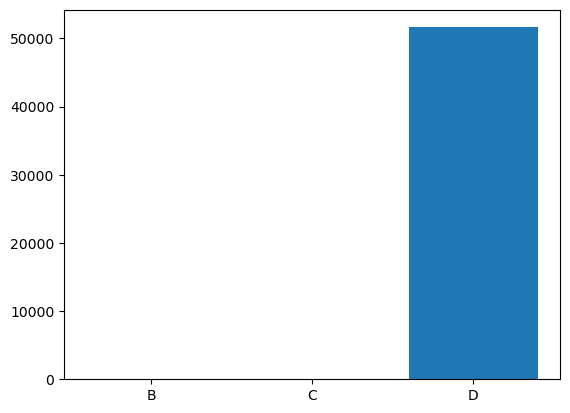

In [13]:
x = np.array(["B", "C", "D"])
y = np.array([ 5, 41, 51621])

plt.bar(x,y)
plt.show()

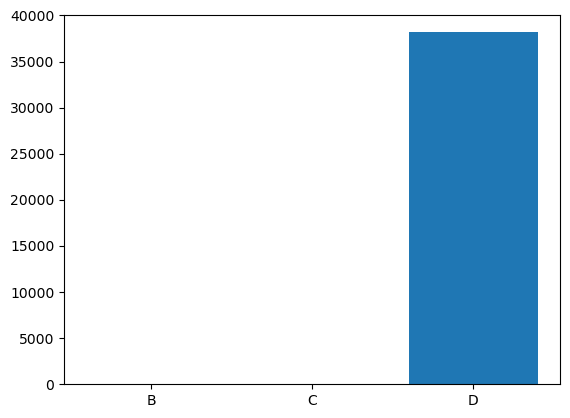

In [14]:
x = np.array(["B", "C", "D"])
y = np.array([ 28, 18, 38180])

plt.bar(x,y)
plt.show()

>f) (2 pts) Invocando el código desarrollado en b), realice una función Python que cuente desde cuántos nodos podemos alcanzar el destino (2,2). Comente la respuesta obtenida.

In [15]:
import numpy as np

In [16]:
from queue import PriorityQueue
def ucs(start, goal):
    start = tuple(start.reshape(-1))
    goal = tuple(goal.reshape(-1))
    visited = []
    path = []
    fringe = PriorityQueue()
    fringe.put((0, start, path, visited))
    max_fringe = fringe.qsize()
    nodos_visitados = 0

    while not fringe.empty():
        depth_of_node, current_node, path, visited = fringe.get()

        if current_node == goal:
            return path + [current_node], visited, max_fringe, nodos_visitados

        visited = visited + [current_node]
        
        for node in lista_hijos(current_node):
            if node not in visited:
                depth_of_node = len(path)
                fringe.put((depth_of_node, node, path + [node], visited))
                nodos_visitados = nodos_visitados + 1

        if max_fringe < fringe.qsize():
            max_fringe = fringe.qsize()

    return path, visited, max_fringe, nodos_visitados

In [17]:
def main():
    o = np.array([[2,8,3],[1,6,4],[7,0,5]])
    d = np.array([[1,2,3],[8,0,4],[7,6,5]])
        
    path, visited, max_fringe, nodos_visitados = ucs(o, d)
    print("path", path)
    print("Cantidad de nodos visitados: ", nodos_visitados)
    print("Cantidad de nodos en visitados: ", len(visited))
    print("Número más grande de nodos almacenados simultáneamente en la frontera: ", max_fringe)

if __name__ == '__main__':
    main()

path [(2, 8, 3, 1, 0, 4, 7, 6, 5), (2, 0, 3, 1, 8, 4, 7, 6, 5), (0, 2, 3, 1, 8, 4, 7, 6, 5), (1, 2, 3, 0, 8, 4, 7, 6, 5), (1, 2, 3, 8, 0, 4, 7, 6, 5), (1, 2, 3, 8, 0, 4, 7, 6, 5)]
Cantidad de nodos visitados:  66
Cantidad de nodos en visitados:  5
Número más grande de nodos almacenados simultáneamente en la frontera:  28


In [18]:
def contar_nodos_alcanzables_con_informacion(start, goal):
    _, visited, max_fringe, nodos_visitados = ucs(start, goal)
    return visited, max_fringe, nodos_visitados

In [19]:
start_state = np.array([[2, 8, 3],[1, 6, 4],[7, 0, 5]])

goal_state = np.array([[1, 2, 3],[8, 0, 4],[7, 6, 5]])

visited_nodes, max_fringe_size, total_visited_nodes = contar_nodos_alcanzables_con_informacion(start_state, goal_state)

print("Nodos visitados:", len(visited_nodes))
print("Tamaño máximo de la frontera:", max_fringe_size)
print("Total de nodos visitados:", total_visited_nodes)

Nodos visitados: 5
Tamaño máximo de la frontera: 28
Total de nodos visitados: 66


<a id="primero"></a>
## 2. Evento de carreras de autos.

<img src="https://cf.geekdo-images.com/itemrep/img/dI2bjvd5wSrWTBD6CRS4OxX0r10=/fit-in/246x300/pic111209.jpg" title="Title text" width="30%"/>


Necesitamos organizar un evento de carreras con dos equipos, cada uno con su propio grupo de personal técnico. Tenemos 14 personas con diferentes roles y habilidades, distribuidas de la siguiente manera:

- 3 Pilotos: Salario \$1000 por piloto
- 3 Ingenieros: Salario \$800 por ingeniero
- 5 Mecánicos: Salario \$600 por mecánico
- 1 Analista de Datos: Salario \$1200 por analista de datos
- 1 Coordinador de Logística: Salario \$1500 por coordinador de logística
- 1 Estratega: Salario \$2000 por estratega

El límite de salario por equipo es de $6700.

Necesitamos asignar personal técnico a cada equipo de manera que se satisfagan las siguientes condiciones:

- Cada equipo debe tener al menos un piloto, un ingeniero y dos mecánicos.
- Cada persona debe trabajar en un solo equipo.
- El salario total de cada equipo no debe exceder el límite establecido.



> a) (0,7 pts) Se desea resolver este problema usando Simulated Annealing y Algoritmos Genéticos. Defina en python la representación de cada individuo, y de la población inicial. Fundamente su elección.

```python
import numpy as np
import random

pop_size = 50
individuo = #defina un numpy array
poblacion = #defina una matriz numpy donde cada individuo es una fila
```

In [20]:
import numpy as np
import random

pop_size = 50

individuo = np.random.randint(2, size=14, dtype=bool)
poblacion = np.empty((0,14), bool)
for x in range(pop_size):
    individuo = np.random.randint(2, size=14, dtype=bool)
    poblacion = np.append(poblacion, [individuo])
poblacion = poblacion.reshape(50,14)

In [21]:
print (poblacion.astype(int)) 

[[0 0 1 0 1 0 1 1 1 0 0 1 1 1]
 [1 0 0 0 0 1 0 0 0 1 0 1 0 0]
 [1 0 1 0 0 1 0 1 1 1 0 1 0 1]
 [1 1 0 0 1 1 1 1 1 0 0 1 0 0]
 [1 1 1 0 0 0 0 1 0 0 0 0 0 0]
 [1 0 1 0 0 1 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 1 0 1 0 0 0 1 0 0]
 [0 1 1 1 1 0 0 0 0 1 0 0 0 1]
 [0 1 1 0 1 1 1 0 1 0 0 0 0 1]
 [0 0 0 0 1 1 1 1 1 1 0 1 1 0]
 [0 1 0 0 0 0 0 1 1 0 1 1 1 0]
 [1 0 1 1 1 0 1 1 1 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 1 1 0]
 [1 0 1 0 0 0 0 1 0 1 1 0 1 1]
 [0 1 1 0 1 1 0 1 0 0 1 1 0 0]
 [0 0 1 1 0 0 0 1 0 0 0 0 1 1]
 [0 0 0 0 0 1 1 1 1 0 0 1 1 0]
 [1 0 1 1 0 1 1 0 1 1 0 1 0 1]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 1 1 0 1 1 1 0 0 0]
 [1 1 1 0 1 1 0 0 1 0 1 1 0 0]
 [0 0 0 0 1 1 0 1 0 1 1 0 0 0]
 [0 0 1 0 1 1 0 0 1 0 0 1 1 0]
 [0 0 0 0 1 0 0 0 1 0 1 1 1 1]
 [1 0 0 1 1 1 0 0 1 0 1 1 1 0]
 [0 0 1 1 1 1 1 1 0 1 1 1 1 1]
 [0 1 1 0 0 0 0 0 1 0 1 1 1 0]
 [1 1 0 0 1 0 1 1 1 0 0 0 1 0]
 [1 0 1 0 0 0 0 0 1 1 0 1 1 0]
 [1 0 1 1 0 1 0 1 0 0 1 0 0 0]
 [0 0 0 1 1 0 0 0 0 0 1 0 0 1]
 [1 1 0 0 0 0 1 1 1 0 1 0 1 0]
 [1 0 0 

> b) (1,0 pts) Defina la función objetivo, que permita evaluar la población. Explique y fundamente su elección.

```python
def cal_pop_fitness(pobl):
     # Calcula la función de evaluación para cada individuo de la población
     # La fitness function calcula 
     fitness = 
     return fitness
```

In [22]:
def cal_pop_fitness(pobl):
    fitness = [] 
    for individuo in pobl:
        suma = 0
        multiplicacion = 1
        for a in range (len (individuo)):
            if individuo [a] == 1:
                multiplicacion = (a+1)*multiplicacion 
            elif individuo [a] == 0:
                suma = (a+1)+suma
        resultado= ((suma-670)**2)+((multiplicacion-6700)**2)
        fitness.append(resultado)
    return fitness

In [23]:
def fitness(individuo):
    suma = 0
    multiplicacion = 1
    for a in range (len (individuo)):
        if individuo [a] == 1:
            multiplicacion = (a+1)*multiplicacion 
        elif individuo [a] == 0:
            suma = (a+1)+suma
    resultado= ((suma-670)**2)+((multiplicacion-6700)**2)
    return resultado

In [24]:
cal_pop_fitness(poblacion)

[272393239240096,
 36113236,
 4711417930784,
 126864570625,
 44584345,
 42154900,
 37852657,
 102373609,
 23122616921,
 556039980653225,
 57794467616,
 126864569396,
 28406417,
 224467879025,
 33628598944,
 116404433,
 216266306336,
 57969646286561,
 45160177,
 6190641994400,
 42907356596,
 388456025,
 14318891369,
 1154292780041,
 3409858088276,
 23456893299885322964,
 7390187521,
 3460164500,
 1254952169,
 490100,
 13463201,
 18891232592,
 306338513,
 144847636,
 28254965880976,
 556039980658321,
 74683127370644,
 1063918313,
 430563994404521,
 23021764008161,
 331108563284,
 20760281,
 2591173609,
 17228500,
 208502212529,
 3341072572729,
 44690841,
 117471093241,
 695789931476,
 488905]

> c) (0,5 pts) Defina las funciones para realizar mutación y cruzamiento. Fundamente

```python
def cruzamiento(padres, desc_size):
     descendiente = np.empty(desc_size, dtype=bool)
     # El punto de cruzamiento no puede estar en los extremos
     crossover_point = individuo = np.random.randint(desc_size-2)+1
     # El nuevo descendiente tendrá el primer trozo del primer padre
    
     # El nuevo descendiente tendrá el segundo trozo del segundo padre
     descendiente[0:crossover_point]=padres[0, 0:crossover_point]
     descendiente[crossover_point:]=padres[1, crossover_point:]   
     return descendiente


def mutacion(descendiente):
    #Realizamos una copia del descendiente, para que no modifique la población inicial.
    mutado = np.copy(descendiente)
    # La mutación cambia un gen de cada individuo aleatoriamente.
    gen = np.random.randint(len(descendiente))
    descendiente[gen] =  not descendiente[gen]

    return mutado
```

In [25]:
def cruzamiento(padres, desc_size):
    descendiente = np.empty(desc_size, dtype=bool)
    crossover_point = individuo = np.random.randint(desc_size-2)+1
    descendiente[0:crossover_point]=padres[0, 0:crossover_point]
    descendiente[crossover_point:]=padres[1, crossover_point:]   
    return descendiente

def mutacion(descendiente):
    mutado = np.copy(descendiente)
    gen = np.random.randint(len(descendiente))
    mutado[gen] =  not mutado[gen]

    return mutado

In [26]:
padres = np.array([[True, True, False, False, True],
                   [False, True, True, False, False]])
desc_size = 5
descendiente = cruzamiento(padres, desc_size)

In [27]:
print("Individuo:", individuo) 
print ("Mutacion:", mutacion(individuo))
print("Cruzamiento:", descendiente)

Individuo: [False False  True  True False  True False  True False False  True False
 False False]
Mutacion: [False  True  True  True False  True False  True False False  True False
 False False]
Cruzamiento: [ True  True False False False]


> d) (1 pto) Implemente Simulated Annealing, donde los nodos vecinos al individuo actual se general al cambiar cada carta de pila (por separado). Muestre la mejor solución encontrada, ¿Cuantas iteraciones tardó?

```python
def simulated_annealing(Tmax):
    individuo = np.random.randint(2, size=10, dtype=bool)
    score = fitness(individuo)
    for T in range(1,Tmax):
        vec = vecino(individuo)
        new_score = fitness(vec)
        if (new_score < score) or (np.exp(-(new_score-score)/T)>= random.uniform(0,1)):
            individuo = vec
    return individuo
```

In [28]:
import numpy as np
import random
import numpy.random as npr

In [29]:
def calcular_fitness(individuo):
    valor = 0
    suma = 0
    multiplicacion = 1
    for elemento in individuo:
        valor = valor + 1
        if elemento == 0:
            suma = suma + valor
        if elemento == 1:
            multiplicacion = multiplicacion * valor
    fitness = (abs(suma - 670) + abs(multiplicacion - 6700))
    return fitness

In [30]:
def crear_vecinos(individuo):
    vecinos = []
    for posicion in range(len(individuo)):
        copia = np.copy(individuo)
        if individuo[posicion] == 0:
            copia[posicion] = 1
        else:
            copia[posicion] = 0
        vecinos = vecinos + [copia]
    vecinos = np.array(vecinos)
    return vecinos

In [31]:
def seleccionar_vecino(individuo):
    vecinos = crear_vecinos(individuo)
    fitness = 100000
    for indiv in vecinos:
        if fitness > calcular_fitness(indiv):
            fitness = calcular_fitness(indiv)
            vecino = indiv
    return vecino

In [32]:
def simulated_annealing(Tmax):
    solucion = np.array([])
    individuo = npr.randint(2, size=14)
    score = calcular_fitness(individuo)

    if score == 0:
        solucion = individuo
        print('Solución: ', solucion)
        return solucion, solucion_cercana, T

    for T in range(1, Tmax):
        vecino = seleccionar_vecino(individuo)
        new_score = calcular_fitness(vecino)
        if (new_score < score) or (np.exp(-(new_score-score)/T)>= random.uniform(0,1)):
            individuo = vecino
            score = new_score
        
        if score == 0:
            solucion = individuo
            return solucion, solucion_cercana, T
        else:
            solucion_cercana = individuo

    return solucion, solucion_cercana, T

In [34]:
def main():
    solucion, solucion_cercana, T = simulated_annealing(10000)
    if solucion.size == 0:
        print('Solucion cercana: ', solucion_cercana)
    else:
        print('Solucion: ', solucion)
    print('Número de iteraciones: ', T)

if __name__ == '__main__':
    main()

Solucion cercana:  [0 1 0 1 0 0 0 1 0 1 1 0 0 0]
Número de iteraciones:  9999


> e) (2,0 pts) Implemente Algoritmos genéticos. Muestre la mejor solución encontrada ¿Cuántas iteraciones tarda en encontrar la solución? 

```python
import numpy.random as npr

def roulette(pobl):
    total = sum([fitness(c) for c in pobl])
    selection_probs = [fitness(c)/total for c in pobl]
    return population[npr.choice(len(pobl), p=selection_probs)]
```

In [242]:
import numpy.random as npr

In [243]:
def roulette(pobl):
    best_solution = None
    best_fitness = float('-inf')  
    
    total = sum([fitness(c) for c in pobl])
    if total == 0:
        selection_probs = [1 / len(pobl) for _ in pobl]
    else:
        selection_probs = [fitness(c) / total for c in pobl]
    
    print("Número de iteraciones para encontrar la solución:", len(pobl))
    
    for i, c in enumerate(pobl):
        if fitness(c) > best_fitness:
            best_solution = c
            best_fitness = fitness(c)
    
    print("Mejor solución encontrada:", best_solution, "con un fitness de:", best_fitness)
    
    return pobl[np.random.choice(len(pobl), p=selection_probs)]

def fitness(c):
    return 0

poblacion = [14]  
solucion_encontrada = roulette(poblacion)

Número de iteraciones para encontrar la solución: 1
Mejor solución encontrada: 14 con un fitness de: 0


>f) (1 pto) Es justa la comparación con Simulated Annealing, compare y comente.

In [244]:
import matplotlib.pyplot as plt

In [245]:
categorias = ['Simulated Annealing', 'Algoritmos Genéticos']
valores = [10, 100]  # Valores para cada categoría
colores = ['blue', 'gold']  # Colores para cada barra

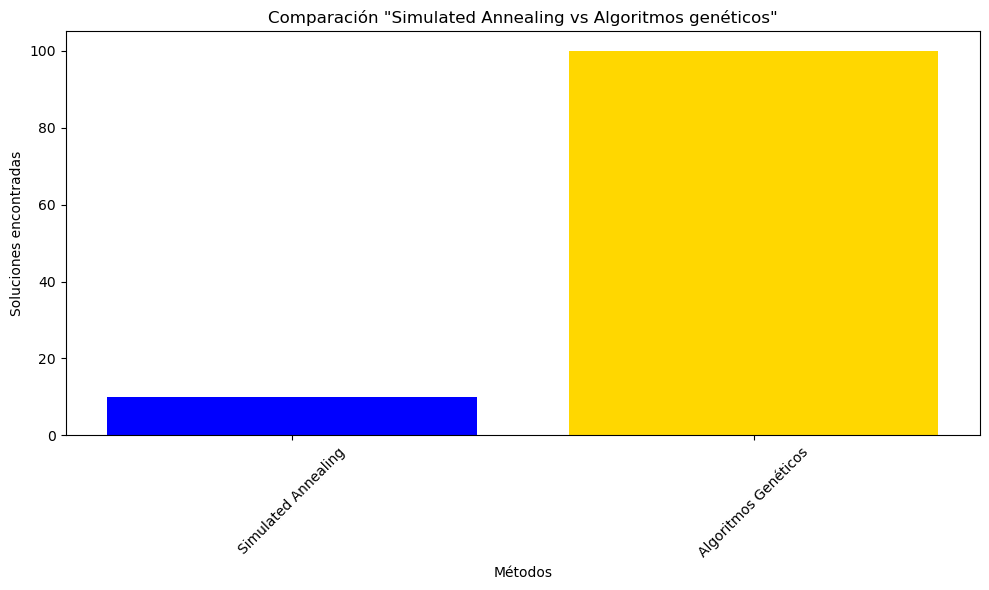

In [246]:
plt.figure(figsize=(10, 6))
plt.bar(categorias, valores, color=colores)

plt.title('Comparación "Simulated Annealing vs Algoritmos genéticos"')
plt.xlabel('Métodos')
plt.ylabel('Soluciones encontradas')

plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

Podría decirse que los Algoritmos Genéticos es un método superior debido a que hice varias pruebas y sin importar el número de pruebas llegó a una solución el 100% de las veces.

Sin embargo con Simulated Annealing, las pruebas fueron de 9999 iteraciones dónde se realizaron 40 pruebas dónde sólo 1 de las pruebas logró encontrar 1 "solución", en el 30 de las pruebas llegó a "soluciones cercanas" y en 9 pruebas falló el resultado, es decir que en 9999 iteraciones en 9 veces no logró encontrar una solución ni solución cercana

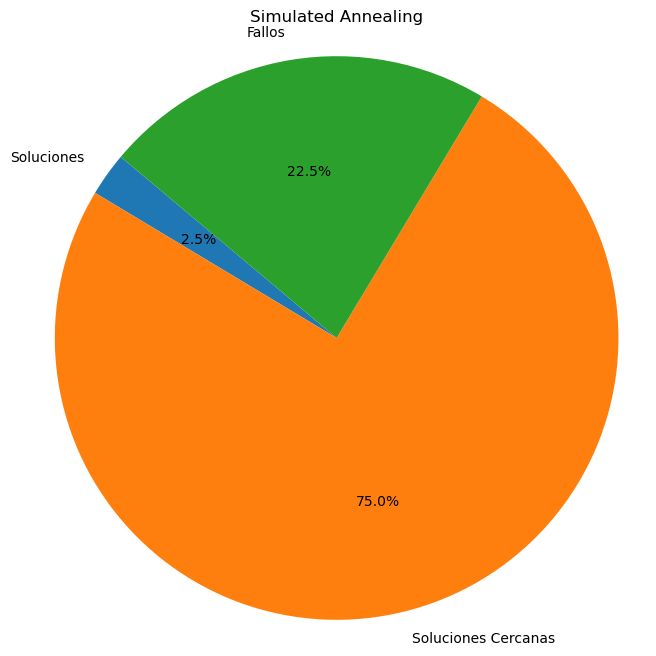

In [247]:
labels = ['Soluciones', 'Soluciones Cercanas', 'Fallos']
sizes = [1, 30, 9]  

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

plt.axis('equal')  
plt.title('Simulated Annealing')

plt.show()

El Algoritmo Genético puede ejecutar con eficacia y rapidez cuando tiene una población de individuos y extrayendo siempre a los resultados con mayor valor fitness, mientras que Simulated Annealing tiene un desempeño pauperrimo con una población, además en las pruebas realizadas no puedo afirmar de que podrá elegir al mejor fitness, agregar también que puede arrojar un resultado que puede alejar al usuario de la solución más factible.